<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
!wget https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [ ]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [ ]:
y_train_original[:3]

In [ ]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [ ]:
y_train[:3]

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1
</div>

In [ ]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [16]:
1000*0.8

800.0

In [20]:
import math
math.ceil((800/64))

13

In [21]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 5s 19ms/step - loss: 2.2247 - accuracy: 0.1950 - val_loss: 2.0634 - val_accuracy: 0.3900
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1.9780 - accuracy: 0.4125 - val_loss: 1.8480 - val_accuracy: 0.5950
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1.7894 - accuracy: 0.5987 - val_loss: 1.6616 - val_accuracy: 0.7250
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.6171 - accuracy: 0.7113 - val_loss: 1.4928 - val_accuracy: 0.7850
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.4546 - accuracy: 0.7613 - val_loss: 1.3412 - val_accuracy: 0.8000
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 1.3066 - accuracy: 0.7800 - val_loss: 1.2045 - val_accuracy: 0.8050
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.1730 - accuracy: 0.8138 - val_loss: 1.0794 - val_accuracy: 0.8050
Epoch 8/100


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

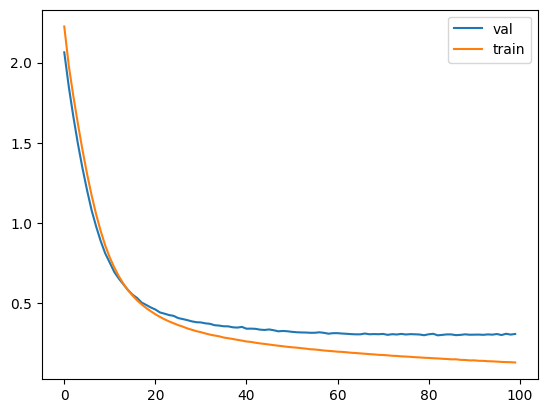

In [29]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

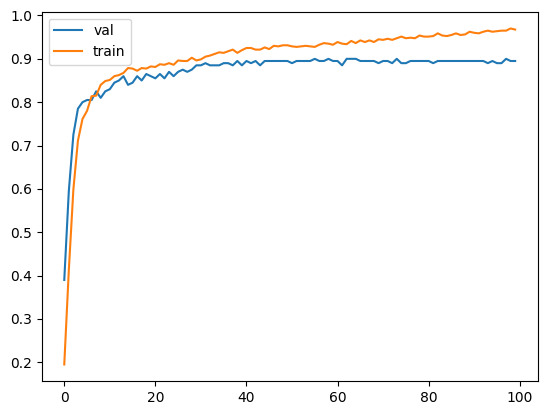

In [28]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [30]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9250

Testing loss: 0.25, acc: 0.93%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [34]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [39]:
predicted_classes = np.argmax(predicted, axis=1)

In [40]:

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 5 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 3 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


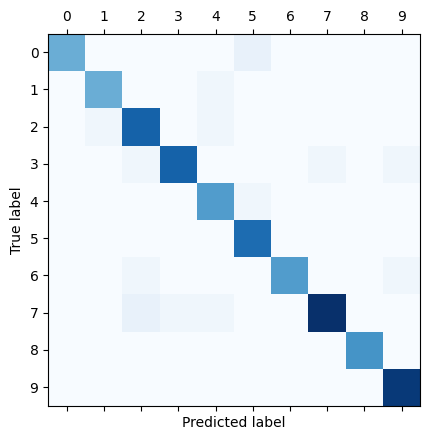

In [41]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");